There are 3 different ways we can train a model:
* Using a direct “closed-form” equation that directly computes the model parameters that best fit the model to the training set (i.e., the model parameters that minimize the cost function over the training set).
* Using an iterative optimization approach, called Gradient Descent (GD), that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method.

  NB: A model that has more parameters is likey to overfit to our trianing dataset, but i will show you to dectect wheter or not if it the case using learning curves. and also several reguralization techniques that can reduce the risk of overfitting on the training datasets
  

# Linear Regression
Mathematically
## Linear Regression model prediction
y = $θ_{0}$+ $θ_{1}X_{1}$ + $θ_{2}X_{2}$ + ⋯ + $θ_{n}X_{n}$

where:
* ŷ is the predicted value
* $n$ is the number of features
* $X_{i}$ is the ith feature value
* $θ_{j}$ is the jth model parameter (including the bias term $θ_{0}$ and the feature weights $θ_{1}$, $θ_{2}$, ⋯, $θ_{n}$)

## Linear Regression model prediction (vectorized form)
y = $h_{\theta}$(X) = $\theta$ * X 

where:
* $h_{\theta}$ is the hypothesis fuction using the model parameter $\theta$

The Mean Square Error(MSE) of a Linear Regression hypothesis hθ on a training set X is calculated using

$MSE(X,$h_\theta$)$ = $(1/m)\Sigma^m_{i=1}$($\theta^T*X^i - y^i$)

where:
 $\theta^T*X^i$ is the prediction, except it is now represented as a single cell matrix rather than a scalar value.($\theta^T$ is the transpose of $\theta

 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [318]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_new = np.array([[0], [2]])

In [319]:
X_b = np.c_[np.ones((100, 1)), X] 

<function matplotlib.pyplot.show(close=None, block=None)>

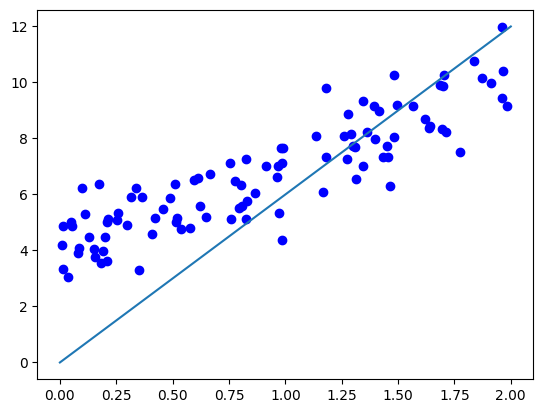

In [320]:
plt.scatter(X,y, color='blue')
plt.plot([0,2], [0,12])
plt.show

bias term =(intercept_) 

feature weights = (coef_).

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print("Intercept: {}\nCoeffiecient {}".format(lin_reg.intercept_, lin_reg.coef_))
lin_reg.predict(X_new)

Intercept: [3.75268023]
Coeffiecient [[3.1949772]]


array([[ 3.75268023],
       [10.14263463]])

In [326]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.01391024],
       [2.97633167]])

In [7]:
np.linalg.pinv(X_b).dot(y)

array([[3.75268023],
       [3.1949772 ]])

## Computational Complexity

The computational complexity of inverting such a matrix is typically about O($n^2.4$) to O($n^3$) (depending on the implementation). In other words, if you double the number of features, you multiply the computationtime by roughly 22.4 = 5.3 to 23 = 8

Now we will look at very different ways to train a Linear Regression model, better suited for cases where there are a large number of features, or too many training instances to fit in memory.

# Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent is guranteed to approach arbitartary close to the global mininum(if you will will wait long long enough and if the learning rate is not too high). When using Gradient scale we should ensure that that all features has same similar scale(e.g using StandardScaler in scikit-learn), or else it will take longer time to converge.

#### NB: Traing a model means searching for a combnation of model parameters that minimizes the cost function (over the training set). The more parameters a model has. The more dimensions a model parameter space has, and the harder the search is.



# Batch Gradient Descent

To implement Gradiet function, you need to calculate how much the cost function will change if you change $\theta_j$ just a bit; this is called partial derivative. 

$(\delta / \delta\theta_j)$ $MSE(\theta)$ = ${(2/m)}\Sigma^m_{i=1}(\theta^TX^i-y^i)X^i_j$

Batch Gradient Descent uses the whole batch of training data at every step to train the model paremeter. Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting $∇θMSE(θ)$ from $θ$. This is where the learning rate $η$ comes into play.multiply the gradient vector by $η$ to determine the size of the downhill step.

* Mathematicaly: Gradient Descent step

    $θ^{(next step)} = θ_i − η∇θMSE(θ)$

  Where:
* $(\theta_i )$ represents the weights to be updated.$

* $(η)$ is the learning rate

* $θMSE(θ)$ is the cost function.

* $(i)$ denotes the iteration index.

To find a good learning rate, you can use grid search (see Chapter 2). However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.

In [327]:
import numpy as np

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term
X_b = np.c_[np.ones((100, 1)), X]

# Parameters
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)
theta = np.random.randn(2, 1)

# Batch Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= learning_rate * gradients

print("Theta using Batch Gradient Descent:", theta)


Theta using Batch Gradient Descent: [[4.22215108]
 [2.96846751]]


# Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. The Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. This makes the algorithm much faster since it has very little data to manipulate at every iteration, which also makes it more it possibel to train on large training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm)

* Extra point: Out-of-core learning is a set of algorithms designed to handle data that exceeds the capacity of a machine's primary memory (RAM)

One thing about SDG is that it cost function will continue to bounce up and down, decreasing only on average. One solution to this is to reduce the learning rate. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

In [328]:
import numpy as np

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term
X_b = np.c_[np.ones((100, 1)), X]

# Parameters
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)
theta = np.random.randn(2, 1)

# Stochastic Gradient Descent
for iteration in range(n_iterations):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta -= learning_rate * gradients

print("Theta using Stochastic Gradient Descent:", theta)

Theta using Stochastic Gradient Descent: [[4.24730911]
 [3.29235337]]


In [8]:
from sklearn.linear_model import SGDRegressor

sgd_lin = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, verbose=1, shuffle=True)
sgd_lin.fit(X,y.ravel())
sgd_lin.intercept_, sgd_lin.coef_

-- Epoch 1
Norm: 3.35, NNZs: 1, Bias: 3.671451, T: 100, Avg. loss: 1.463366
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.31, NNZs: 1, Bias: 3.716990, T: 200, Avg. loss: 0.624726
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 3.08, NNZs: 1, Bias: 3.555108, T: 300, Avg. loss: 0.599588
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 3.18, NNZs: 1, Bias: 3.668938, T: 400, Avg. loss: 0.615418
Total training time: 0.07 seconds.
-- Epoch 5
Norm: 3.27, NNZs: 1, Bias: 3.758521, T: 500, Avg. loss: 0.615280
Total training time: 0.07 seconds.
-- Epoch 6
Norm: 3.20, NNZs: 1, Bias: 3.716600, T: 600, Avg. loss: 0.598134
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 3.13, NNZs: 1, Bias: 3.634836, T: 700, Avg. loss: 0.601767
Total training time: 0.07 seconds.
-- Epoch 8
Norm: 3.33, NNZs: 1, Bias: 3.812938, T: 800, Avg. loss: 0.595392
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 3.29, NNZs: 1, Bias: 3.765142, T: 900, Avg. loss: 0.612094
Total training time: 0.07 seconds.
-

(array([3.74819884]), array([3.18939993]))

# Mini-batch Gradient Descent
Minibatch GD computes the gradients on small random sets of instances called minibatches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

In [329]:
import numpy as np

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term
X_b = np.c_[np.ones((100, 1)), X]

# Parameters
learning_rate = 0.1
n_iterations = 1000
batch_size = 20
m = len(X_b)
theta = np.random.randn(2, 1)

# Mini-batch Gradient Descent
for iteration in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)
        theta -= learning_rate * gradients

print("Theta using Mini-batch Gradient Descent:", theta)

Theta using Mini-batch Gradient Descent: [[4.21021974]
 [2.95306829]]


| Algorithms | Large m | Out-of-core support | Large n | Hyperparams | Scaling required | Scikit-learn |
|:---------|:--------:|---------:|---------:| ---------:| ---------:| ---------:|
|  Normal Equation   |  Fast  |  No   |  Slow   |  0   |  No   |  n/a   |
|  SVD   |  Fast   |  No   |  Slow   |  0   |  No   |  LinearRegression   |
|  Batch GD  |  Slow   |  No   |  Fast   |  2   |  Yes   |  SGSRegressor   |
|  Stochatic GD  |  Fast   |  Yes   |  Fast   |  $≥$2   |  Yes   |  SGSRegressor   |
|  Batch GD  |  Fast   |  Yes   |  Fast   |  $≥$2   |  Yes   |  SGSRegressor   |


### m is the number of training instances and n is the number of features. There is almost no difference after training: all these algorithms end up with very similar models and make predictions in exactly the same way. (SVD is Singular Value Decomposition)

# Polynomial Regression

This is when you data is more complex than a straight line

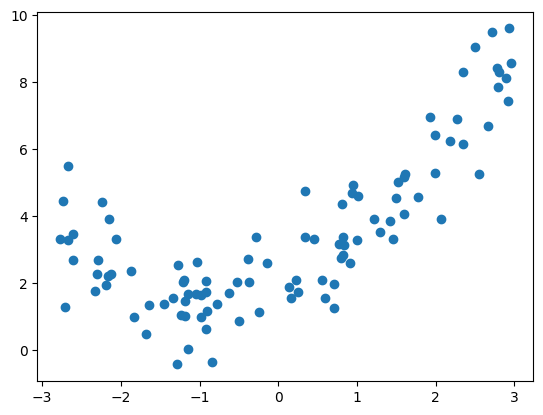

In [9]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X,y)
plt.show()

If there were two features a and b, PolynomialFeatures with degree=3 would not only add the features $a^2$, $a^3$, $b^2$, and $b^3$, but also the combinations $ab$, $a^2b$, and $ab^2$.

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-1.14349159]), array([-1.14349159,  1.30757301]))

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[0.87767527, 0.4942192 ]]), array([1.98528266]))

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [13]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1,random_state=42, shuffle=True)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()

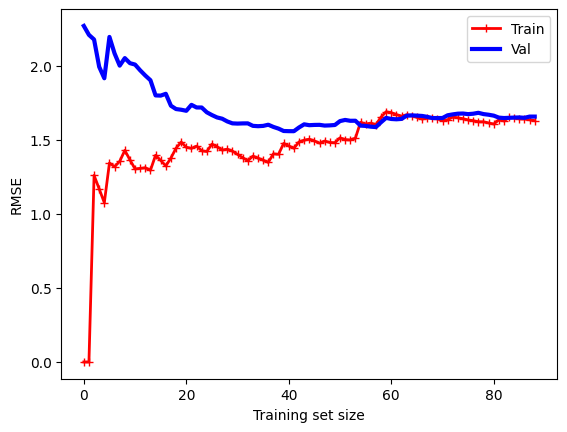

In [14]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

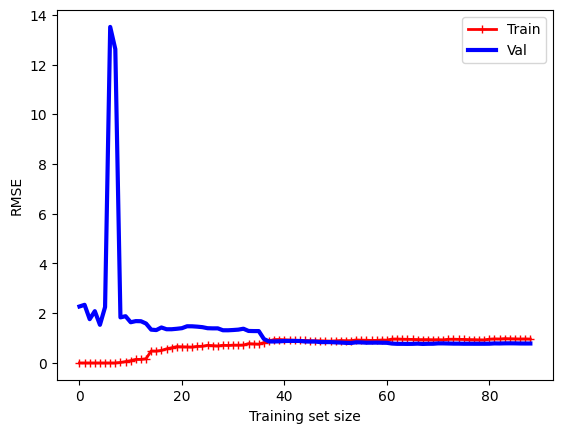

In [15]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=7, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(polynomial_regression,X,y)

## Extra-Points:

### _Bias/Variance Tradeoff_
_Bias:_ This is a part of generalization error is due to wrong  assumptions, such as assumptions that is linear when it's actualy quadratic. A high bias model is most likely to underfit the training set 

_Variance_: This is due to model's excessive sensitivity to small variations in the training set. A model with many degress of freedom(such as a high polynomial model)is likely to have a high variance, and overfit the training datasets

_Irreducible error:_ This part is due to noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as brokensensors, or detect and remove outliers)

#### Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a tradeoff.


# Regularizing a Linear Model

A good way to reduce overfitting to to constrain it(regualarization): the fewer the degrees of freedom it has, the harder it will be to overfit the data, a simple way to regularize  a polynomial model is to reduce the number of polynomial degrees.

For a linear model, regularization is typically achieved by  constraining the weights of the model. We will consider Lasso Regression(l1), Ridge Regression(l2), Elastic Regression.

# Ridge Regression

Ridge Regression (also called Tikhonov regularization) is a regularizaed version of Linear regression. This foreces the data to not only fit the data but also keep the model weights small as possible.

Note: The regulazation term should only be added to the cost function during training.

The hyperparameter $α$ controls how much you want to regularize the model. If $α = 0$ then Ridge Regression is just Linear Regression. If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

Mathematically:

$J\theta$ = $MSE(\theta) + \alpha(1/2)\Sigma^n_{i=1}\theta^2_i$

It is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

In [35]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky') #Or 'sag' solver
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.87551586]])

In [32]:
# Using Stochastic Regressor
sdg_reg = SGDRegressor(penalty='l2')
sdg_reg.fit(X, y.ravel())
sdg_reg.predict([[1.5]])

array([4.86198163])

# Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is another regularized version of Linear Regression.  it adds a regularization term to the cost function, but it uses the $ℓ1$ norm of the weight vector instead of half the square of the $ℓ2$ norm.

Mathematically:

$J\theta$ = $MSE(\theta) + \alpha\Sigma^n_{i=1}|\theta_i|$

An important characteristic of Lasso Regression is that it tends to completly eliminate the weights of the least important features(i.e set them to zero), which means that lasso regression automatically performs feature selaection and outputs a sparse model.

In [43]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.83024187])

# Increasing $α$ leads to flatter (i.e., less extreme, more reasonable) predictions; this reduces the model’s variance but increases its bias.

# Elastic Regression

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. We can control the mix ratio $r$. When $r = 0$ Elastic regression is equivalent to Ridge regression and when $r = 1$, it is equivalent to Lasso regression.

Mathematically:

$J\theta$ = $MSE(\theta) + r\alpha\Sigma^n_{i=1}|\theta_i| + ((1-r)/2) \alpha\Sigma^n_{i=1}\theta^2_i$

In [53]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.83157583])

# Early Stoping
A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum which is known as Early Stoping.

In [61]:
from sklearn.base import clone,is_outlier_detector
from sklearn.preprocessing import StandardScaler

In [156]:
X = X = 6 * np.random.rand(1000, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(1000, 1)
y = y.ravel()
X_train,X_val, y_train,y_val = X[:800], X[800:],y[:800],y[800:]

poly_scaler = Pipeline([
    ('poly_scaler', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly = poly_scaler.fit_transform(X_train)
X_val_poly =poly_scaler.fit_transform(X_val)

sdg_reg = SGDRegressor(max_iter=100, tol=0.2, warm_start=True,
                      penalty=None, learning_rate='constant', eta0=5e-4, verbose=0)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sdg_reg.fit(X_train_poly, y_train)
    y_val_predict = sdg_reg.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch =epoch
        best_model = clone(sdg_reg)

# Logistic Regression

Logistic Regression(also known as Logit Regression) is mostly used to estimate the probability that an instance belongs to a particular class 

In [189]:
from sklearn import datasets

In [190]:
iris = datasets.load_iris()
list(iris.keys())


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [299]:
X = iris['data'][:, 3:] # selects only the 'petal width (cm) features
y = (iris['target'] == 2).astype(np.int_)  # Selects only the 'virginica' target

In [300]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X,y)

LogisticRegression(max_iter=1000)

Text(0, 0.5, 'Y proba')

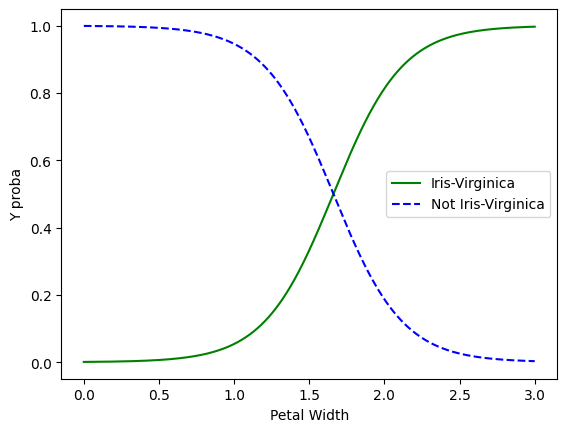

In [301]:
X_new = np.linspace(0,3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.autoscale()
plt.legend()
plt.xlabel('Petal Width')
plt.ylabel('Y proba')

# Softmax Regrssion
It supports multiple binary classes without having to combine multiple binary classifier

In [317]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

softmax_reg.predict([[5,2]])
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])